1. Clean up the dataset

In [2]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# clean data for potential na/empty cells
data_df = pd.read_csv('preproc.csv')
data_df.dropna(inplace=True)
data_df.drop_duplicates(inplace=True)

# get rid of first column since it a duplicate of indexes
data_df = data_df[data_df.columns[1:]]
# data_df

2. Find the optimal k. Optimal k for all pairs is k=4

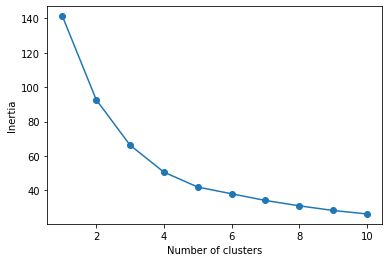

In [25]:
from sklearn.preprocessing import MinMaxScaler

attr = ['danceability', 'energy', 'liveness']

# normalize data
scaler = MinMaxScaler()
data_df[attr] = scaler.fit_transform(data_df[attr])

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_df[attr])
    inertia.append(kmeans.inertia_)

# plot elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

3. Create model to cluster data

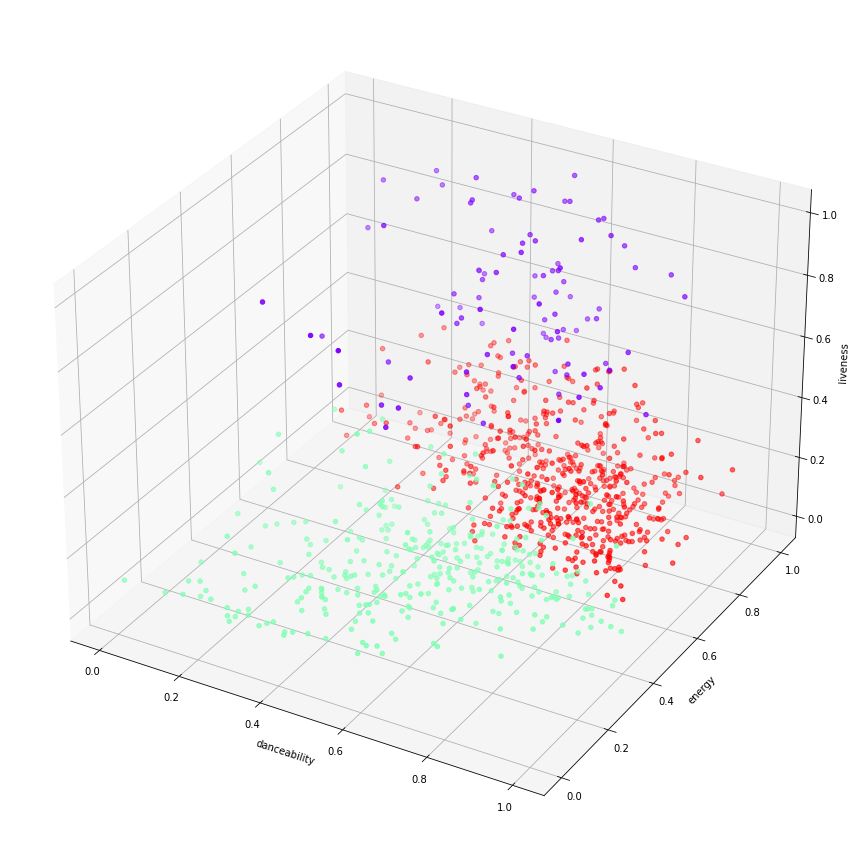

In [27]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(data_df[attr])
data_df['cluster'] = model.labels_

# plot 3d scatter plot
fig = plt.figure()

# increase size of plot
fig.set_size_inches(20.5, 15.5)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_df['danceability'], data_df['energy'], data_df['liveness'], c=data_df['cluster'], cmap='rainbow')
ax.set_xlabel('danceability')
ax.set_ylabel('energy')
ax.set_zlabel('liveness')
plt.show()

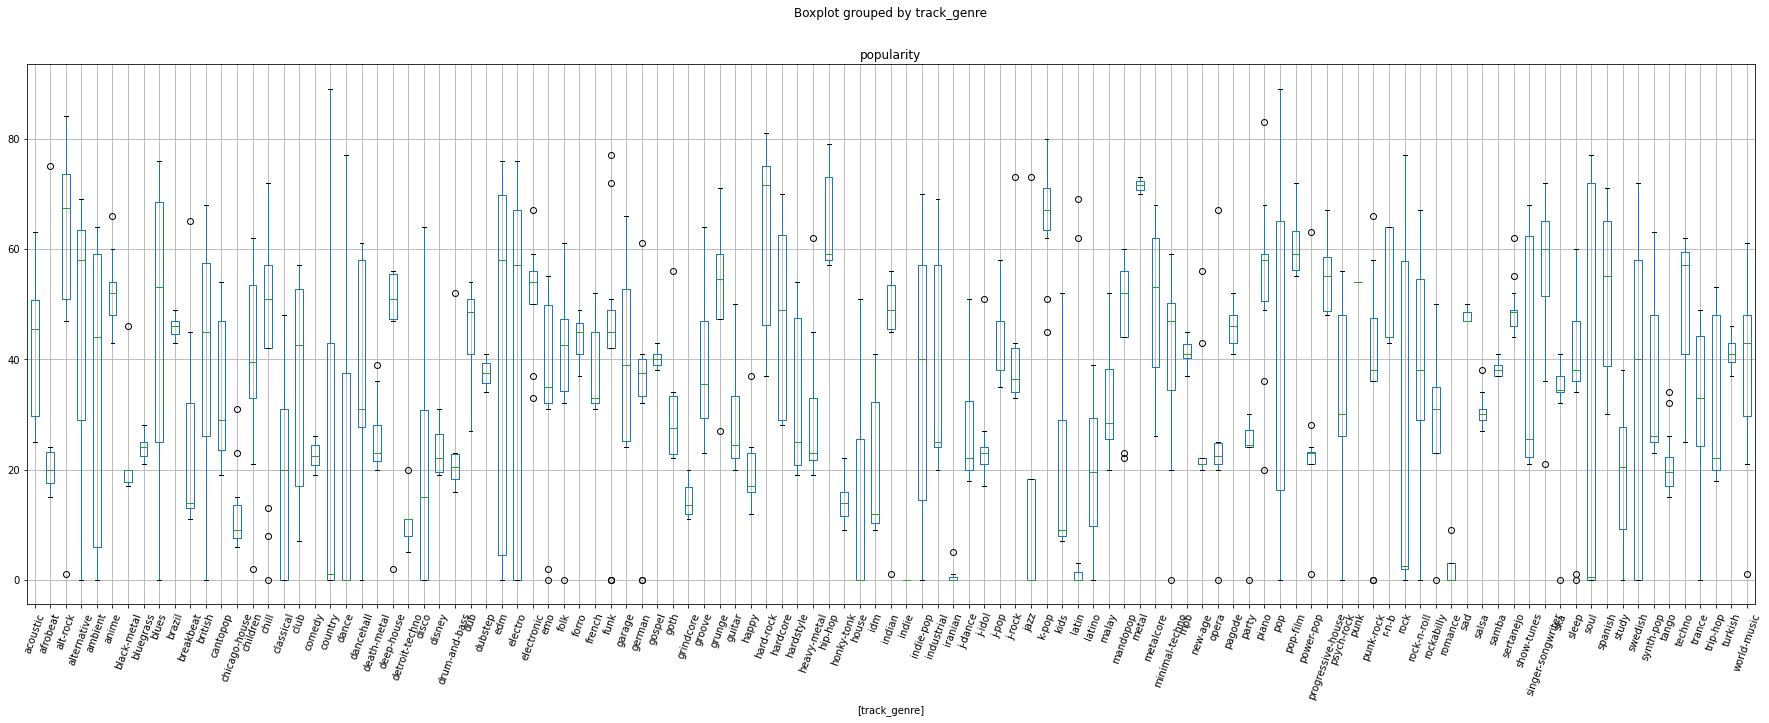

In [32]:
from collections import Counter
genre = data_df[['track_genre', 'popularity']]
genre.boxplot(by='track_genre', figsize=(30, 10), rot=70)
plt.show()


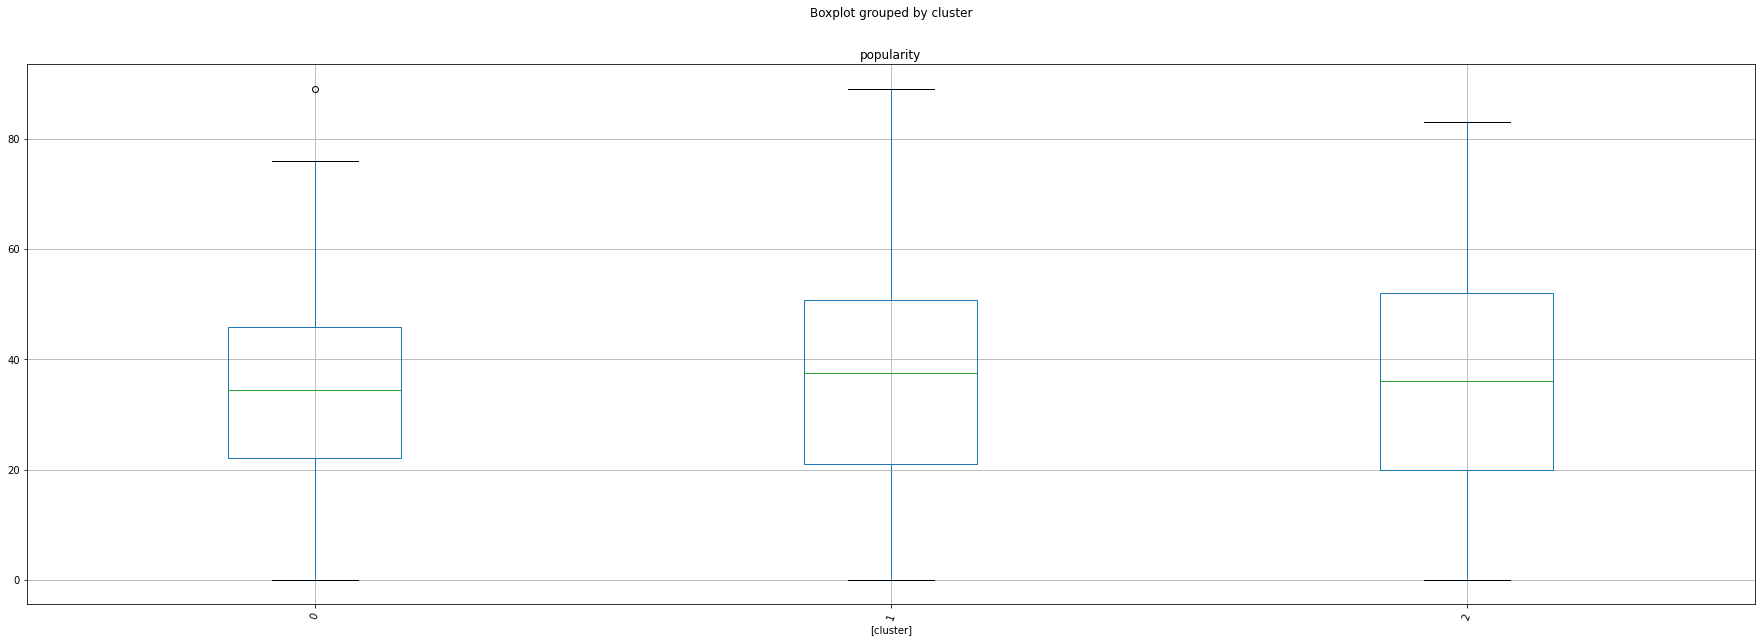

In [28]:
# plot popularity of each cluster
popularity = data_df[['cluster', 'popularity']]
popularity.boxplot(by='cluster', figsize=(30, 10), rot=70)
plt.show()